In [18]:
from tensorflow import keras

In [19]:
# conv1-1~2,->pooling, conv2-1~2->pooling, conv3-1~3,->pooling, conv4-1~3,->pooling, conv5-1~3,->pooling, Dense*3

In [20]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [21]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
import numpy as np

input = np.concatenate((X_train, X_test), axis=0)
target = np.concatenate((y_train, y_test), axis=0)

In [24]:
input.shape

(70000, 28, 28)

In [25]:
target = target.reshape(-1, 1)

In [26]:
from sklearn.model_selection import train_test_split

input = input.reshape(-1, 28, 28, 1)
input = input / 255.0
train_input, test_input, train_target, test_target = train_test_split(
    input, target, test_size=0.2, 
    random_state = 42)

In [27]:
train_target.shape

(56000, 1)

In [28]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [29]:
from graph import paint_graph

In [30]:
def test_activation(activation, title=None):
    model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation=activation, input_shape=(28, 28, 1), padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation=activation, padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    
    keras.layers.Dense(100, activation=activation),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
    ])
    
    adam = keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    Early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    history = model.fit(train_input, train_target, epochs=100, batch_size=64, 
                        validation_data=(test_input, test_target),
                        callbacks=[Early_stopping_cb])
    paint_graph(history, title=title) # 해당 activation function의 loss-epochs 그래프를 그려주는 함수

In [31]:
def y_x(x):
    return keras.backend.tanh(keras.backend.softplus(x))

Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.2923 - loss: 1.8933 - val_accuracy: 0.7887 - val_loss: 0.5752
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7781 - loss: 0.6135 - val_accuracy: 0.8241 - val_loss: 0.4663
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8184 - loss: 0.5047 - val_accuracy: 0.8465 - val_loss: 0.4042
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8360 - loss: 0.4503 - val_accuracy: 0.8548 - val_loss: 0.3809
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8457 - loss: 0.4213 - val_accuracy: 0.8633 - val_loss: 0.3578
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8562 - loss: 0.3939 - val_accuracy: 0.8701 - val_loss: 0.3422
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8622 - loss: 0.3748 - val_accuracy: 0.8764 - val_loss: 0.3246
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8673 - loss: 0

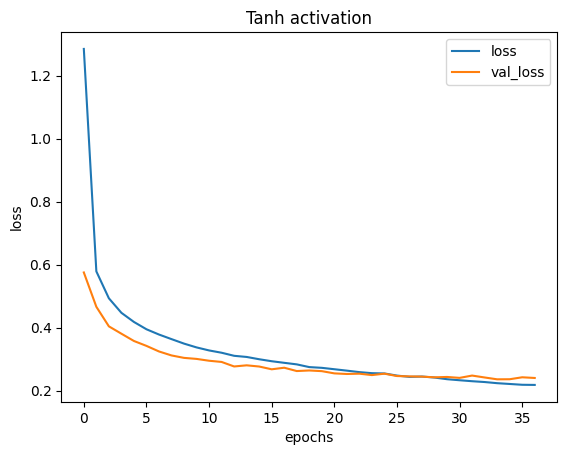

In [32]:
test_activation(test_, 'Tanh activation')

Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.1573 - loss: 2.1902 - val_accuracy: 0.7624 - val_loss: 0.6266
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7663 - loss: 0.6467 - val_accuracy: 0.8238 - val_loss: 0.4722
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8120 - loss: 0.5212 - val_accuracy: 0.8405 - val_loss: 0.4238
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8366 - loss: 0.4505 - val_accuracy: 0.8624 - val_loss: 0.3703
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8490 - loss: 0.4170 - val_accuracy: 0.8676 - val_loss: 0.3534
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8581 - loss: 0.3901 - val_accuracy: 0.8716 - val_loss: 0.3379
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8677 - loss: 0.3662 - val_accuracy: 0.8814 - val_loss: 0.3144
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8710 - loss: 0

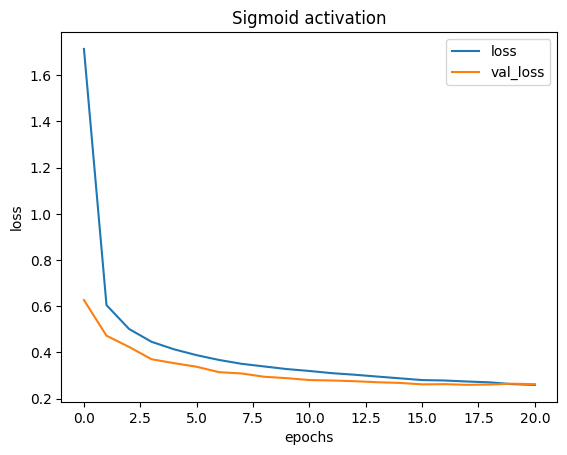

In [33]:
test_activation('sigmoid', title='Sigmoid activation')

Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.1674 - loss: 2.1983 - val_accuracy: 0.5593 - val_loss: 1.5437
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.3667 - loss: 1.6431 - val_accuracy: 0.7019 - val_loss: 1.2259
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4271 - loss: 1.4559 - val_accuracy: 0.7640 - val_loss: 1.0173
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4478 - loss: 1.3824 - val_accuracy: 0.7954 - val_loss: 0.9036
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.4733 - loss: 1.3361 - val_accuracy: 0.8044 - val_loss: 0.8311
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.4653 - loss: 1.3209 - val_accuracy: 0.8118 - val_loss: 0.7860
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.4795 - loss: 1.2936 - val_accuracy: 0.8177 - val_loss: 0.7815
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.4883 - loss: 1

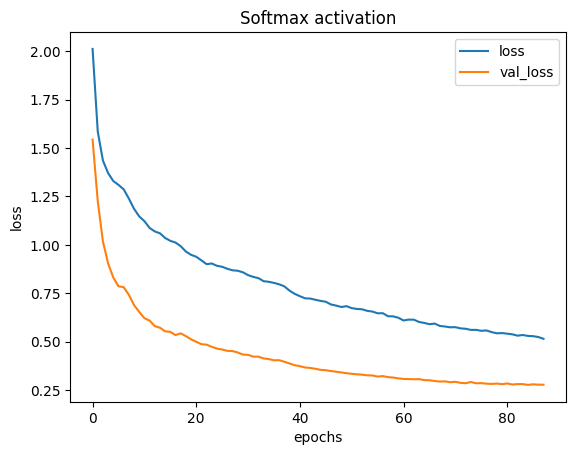

In [34]:
test_activation('softmax', title='Softmax activation')

Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7624 - loss: 0.6757 - val_accuracy: 0.8839 - val_loss: 0.3369
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8779 - loss: 0.3556 - val_accuracy: 0.8876 - val_loss: 0.3180
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8925 - loss: 0.3049 - val_accuracy: 0.8977 - val_loss: 0.2872
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9036 - loss: 0.2811 - val_accuracy: 0.8956 - val_loss: 0.2942
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9072 - loss: 0.2631 - val_accuracy: 0.9029 - val_loss: 0.2737
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9117 - loss: 0.2459 - val_accuracy: 0.9037 - val_loss: 0.2699
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9196 - loss: 0.2278 - val_accuracy: 0.9083 - val_loss: 0.2662
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9219 - loss: 0

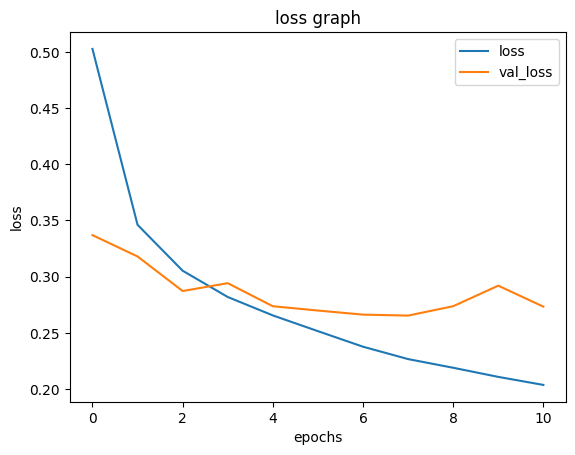

In [35]:
import tensorflow as tf

def gaussian_pdf(x):
    return x

test_activation(gaussian_pdf)

In [39]:
def junsung_activation(x):
    x = tf.cast(x, dtype=tf.float32)
    return tf.multiply(2.0, x) / (tf.square(x) + 1.0)

def gamma_factorial(x):
    abs_x = tf.abs(x)
    return tf.math.exp(tf.math.lgamma(abs_x + 1))

def volcano_function(x):
    abs_x_fact = gamma_factorial(x)
    return 1.0 / abs_x_fact

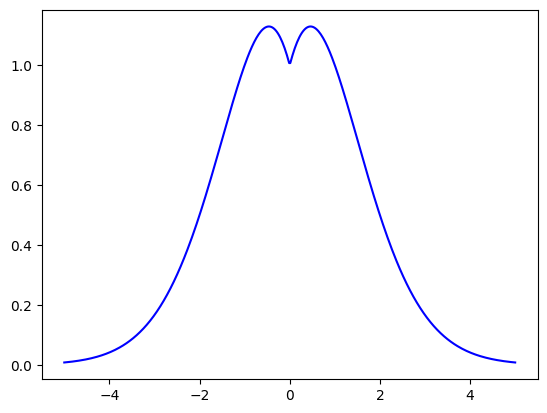

In [37]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-5, 5, 400)
y_vals = volcano_function(x_vals).numpy()

# 그래프 그리기
plt.plot(x_vals, y_vals, color='b')

c:\Users\dlwns\Desktop\Study\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.7666 - loss: 0.6664 - val_accuracy: 0.8885 - val_loss: 0.3139
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.8806 - loss: 0.3418 - val_accuracy: 0.9001 - val_loss: 0.2794
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.8945 - loss: 0.3019 - val_accuracy: 0.8976 - val_loss: 0.2752
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9044 - loss: 0.2701 - val_accuracy: 0.9021 - val_loss: 0.2603
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9095 - loss: 0.2559 - val_accuracy: 0.9066 - val_loss: 0.2602
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9129 - loss: 0.2443 - val_accuracy: 0.9094 - val_loss: 0.2523
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9213 - loss: 0.2245 - val_accuracy: 0.9092 - val_loss: 0.2529
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.9203 - loss: 0

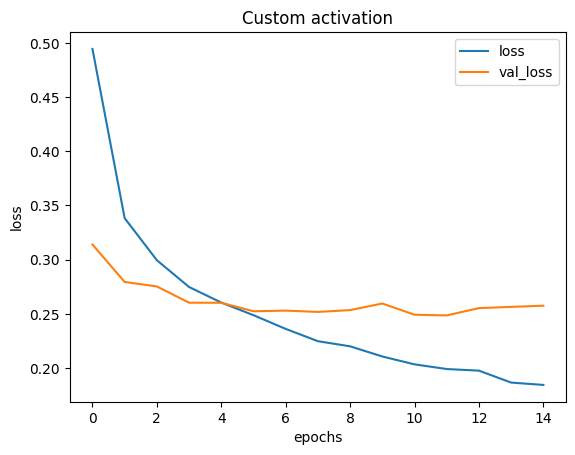

In [40]:
test_activation(junsung_activation, title='Custom activation')

c:\Users\dlwns\Desktop\Study\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 98s 110ms/step - accuracy: 0.1036 - loss: 2.3244 - val_accuracy: 0.0959 - val_loss: 2.3028
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 94s 107ms/step - accuracy: 0.0998 - loss: 2.3028 - val_accuracy: 0.0971 - val_loss: 2.3025
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 98s 112ms/step - accuracy: 0.3173 - loss: 1.7767 - val_accuracy: 0.7724 - val_loss: 0.6029
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 100s 114ms/step - accuracy: 0.7521 - loss: 0.6603 - val_accuracy: 0.8009 - val_loss: 0.5183
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 100s 115ms/step - accuracy: 0.7865 - loss: 0.5779 - val_accuracy: 0.8252 - val_loss: 0.4750
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.8046 - loss: 0.5369 - val_accuracy: 0.8294 - val_loss: 0.4454
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 68s 77ms/step - accuracy: 0.8196 - loss: 0.4986 - val_accuracy: 0.8436 - val_loss: 0.4181
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 69s 79ms/step - accuracy: 0.8264 - 

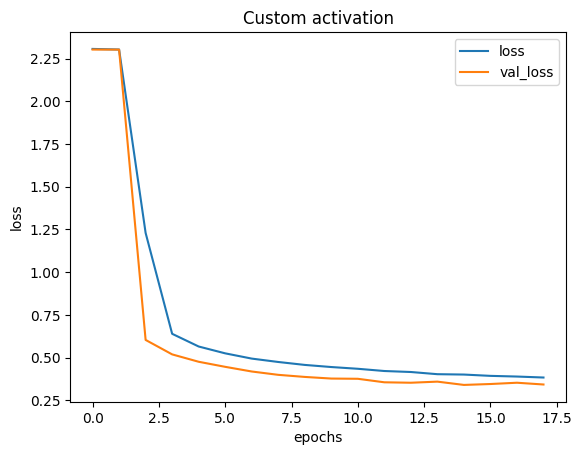

In [41]:
test_activation(volcano_function, title='Custom activation')

In [53]:
def MadeInChina(x):
    x = tf.cast(x, dtype=tf.float32)
    result = tf.where(x < 0, tf.math.pow(5.0, x) - 1, x)
    return result

In [49]:
print(MadeInChina(-2))

tf.Tensor(-0.96, shape=(), dtype=float32)


Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.7674 - loss: 0.6582 - val_accuracy: 0.8839 - val_loss: 0.3267
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.8773 - loss: 0.3517 - val_accuracy: 0.8984 - val_loss: 0.2841
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.8927 - loss: 0.3052 - val_accuracy: 0.9035 - val_loss: 0.2642
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.9008 - loss: 0.2775 - val_accuracy: 0.9076 - val_loss: 0.2559
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.9085 - loss: 0.2538 - val_accuracy: 0.9098 - val_loss: 0.2620
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.9144 - loss: 0.2408 - val_accuracy: 0.9100 - val_loss: 0.2443
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.9188 - loss: 0.2234 - val_accuracy: 0.9106 - val_loss: 0.2527
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.9226 - loss: 0

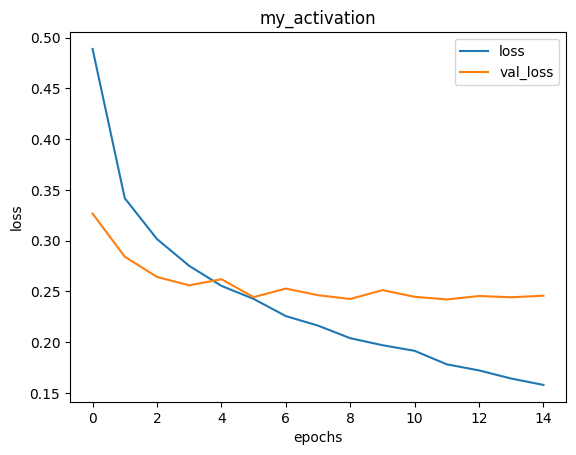

In [54]:
test_activation(MadeInChina, title='my_activation')

c:\Users\dlwns\Desktop\Study\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7595 - loss: 0.6839 - val_accuracy: 0.8819 - val_loss: 0.3364
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8746 - loss: 0.3582 - val_accuracy: 0.8899 - val_loss: 0.3023
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8906 - loss: 0.3058 - val_accuracy: 0.9001 - val_loss: 0.2713
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9015 - loss: 0.2748 - val_accuracy: 0.9003 - val_loss: 0.2680
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9092 - loss: 0.2573 - val_accuracy: 0.9089 - val_loss: 0.2517
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9143 - loss: 0.2369 - val_accuracy: 0.9091 - val_loss: 0.2535
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9180 - loss: 0.2230 - val_accuracy: 0.9101 - val_loss: 0.2430
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9231 - loss: 0

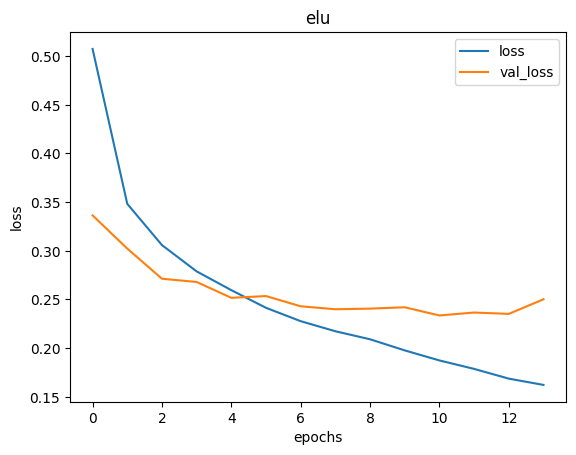

In [59]:
test_activation('elu', title='elu')